In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import xlrd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn
from xgboost import XGBClassifier
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
import joblib
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier


In [ ]:
pip install matplotlib --upgrade #needs upgrade matplotlib for better visualization(g.containers[0]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/ready_Model.pickle')
df = data.copy()


In [ ]:
df.drop(['make'], axis=1,inplace=True)


In [ ]:

df.shape

(69511, 160)

In [ ]:
df

,province,make_model,price,body_type,registration,vehicle_age,mileage,Gearbox,gears,seller,...,Rear airbag,Side airbag,Speed limit control system,Tire pressure monitoring system,Traffic sign recognition,Xenon headlights,Adaptive Cruise Cntrl,Central door lock with remote contrl,Electronic stability contrl,Traction contrl
0,6,1,4450,0,2003.0,19.0,191066.0,0,7,0,...,0,1,0,0,0,0,0,1,1,1
1,5,1,12950,0,2013.0,9.0,94758.0,0,7,0,...,0,0,0,0,0,0,0,1,0,0
2,6,1,12445,0,2013.0,9.0,160883.0,0,7,0,...,0,1,0,0,0,0,0,1,1,1
3,6,0,12450,0,2015.0,7.0,145102.0,0,7,0,...,0,1,0,1,0,0,0,1,1,1
4,3,0,14945,0,2015.0,7.0,119666.0,0,7,0,...,0,1,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69506,9,364,1999,5,2005.0,17.0,363613.5,1,5,0,...,0,1,0,0,0,0,0,1,1,1
69507,2,364,3950,5,2005.0,17.0,251723.0,1,5,0,...,0,1,0,0,0,0,0,1,1,1
69508,1,364,3449,5,2004.0,18.0,340257.0,1,5,0,...,0,1,0,0,0,0,0,1,0,1
69509,7,363,1650,5,2004.0,18.0,363613.5,1,5,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:

X = df.drop(columns = 'price')
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Lasso Regression

In [ ]:


lasso_model = Lasso().fit(X_train, y_train)

R2_Score

In [ ]:
lasso = lasso_model.score(X_test, y_test)
lasso


0.8302161691141415

RMSE

In [ ]:
lasso_sqrt = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))
lasso_sqrt

8130.336532973583

## ridge_model

In [ ]:
# define model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
ridge = r2_score(y_test, ridge_model.predict(X_test))
ridge_sqrt = np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

In [ ]:
print('R2 SCORE=' , r2_score(y_test, ridge_model.predict(X_test)))
print('RMSE SCORE=' , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))

R2 SCORE= 0.8302347290155552
RMSE SCORE= 8129.892137391842


## knn_model

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
knn = r2_score(y_test, y_pred)
knn_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' ,knn)
print('RMSE SCORE=' , knn_sqrt)

R2 SCORE= 0.8660816546651933
RMSE SCORE= 7220.718186368376


##ElasticNet

In [ ]:

from sklearn.linear_model import ElasticNet

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_ElasticNet= ElasticNet(random_state=0)
model_ElasticNet.fit(X_train,y_train)

ElasticNet(random_state=0)

In [ ]:
y_pred = model_ElasticNet.predict(X_test)

In [ ]:
elastic = r2_score(y_test, y_pred)
elastic_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2_Score :',model_ElasticNet.score(X_test, y_test))

print('RMSE Score :',np.sqrt(mean_squared_error(y_test, model_ElasticNet.predict(X_test))))


R2_Score : 0.7799175530381088
RMSE Score : 9256.633334541346


##LGBM Regressor

In [ ]:
import lightgbm as lgb



X = df.drop(columns = 'price')
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[33276]	valid_0's l2: 1.02326e+07	valid_0's l1: 1535.1
[33277]	valid_0's l2: 1.02326e+07	valid_0's l1: 1535.1
[33278]	valid_0's l2: 1.02326e+07	valid_0's l1: 1535.1
[33279]	valid_0's l2: 1.02326e+07	valid_0's l1: 1535.09
[33280]	valid_0's l2: 1.02326e+07	valid_0's l1: 1535.09
[33281]	valid_0's l2: 1.02327e+07	valid_0's l1: 1535.09
[33282]	valid_0's l2: 1.02326e+07	valid_0's l1: 1535.09
[33283]	valid_0's l2: 1.02326e+07	valid_0's l1: 1535.09
[33284]	valid_0's l2: 1.02325e+07	valid_0's l1: 1535.09
[33285]	valid_0's l2: 1.02325e+07	valid_0's l1: 1535.09
[33286]	valid_0's l2: 1.02324e+07	valid_0's l1: 1535.1
[33287]	valid_0's l2: 1.02324e+07	valid_0's l1: 1535.09
[33288]	valid_0's l2: 1.02324e+07	valid_0's l1: 1535.09
[33289]	valid_0's l2: 1.02323e+07	valid_0's l1: 1535.09
[33290]	valid_0's l2: 1.02323e+07	valid_0's l1: 1535.08
[33291]	valid_0's l2: 1.02323e+07	valid_0's l1: 1535.09
[33292]	valid_0's l2: 1.02323e+07	valid_0's l1: 1535.09
[

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
joblib.dump(gbm,'/content/drive/MyDrive/Colab Notebooks/LGBM regressor.sav') 

['/content/drive/MyDrive/Colab Notebooks/LGBM regressor.sav']

In [ ]:
gbm = joblib.load('/content/drive/MyDrive/Colab Notebooks/LGBM regressor.sav')

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:
gbmm = r2_score(y_test, y_pred)
gbm_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' , gbmm)
print('RMSE SCORE=' , gbm_sqrt)

R2 SCORE= 0.9737571100366773
RMSE SCORE= 3196.4372850082013


In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
linear = r2_score(y_test, y_pred)
linear_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))




In [ ]:
Kne = KNeighborsRegressor()
Kne.fit(X_train, y_train)

y_pred = Kne.predict(X_test)
Kne = r2_score(y_test, y_pred)
Kne_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))



In [ ]:

Random = RandomForestRegressor(n_estimators=50)
Random.fit(X_train, y_train)
y_pred = Random.predict(X_test)
Random = r2_score(y_test, y_pred)
Random_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))



In [ ]:
XGB = XGBRegressor(objective='reg:linear')
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
XGB = r2_score(y_test, y_pred)
XGB_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))



[16:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
dict = {'Model Name':['LassoReggression','Ridge','Knn','ElasticNet','LGBMRegression','linear','Kne','Random','Xgb'],'R2 Score':[lasso,ridge,knn,elastic,gbmm,linear,Kne,Random,XGB],'Sqrt':[lasso_sqrt,ridge_sqrt,knn_sqrt,elastic_sqrt,gbm_sqrt,linear_sqrt,Kne_sqrt,Random_sqrt,XGB_sqrt]}

In [ ]:
scores = pd.DataFrame(dict)
scores  = scores.sort_values('R2 Score')
scores

,Model Name,R2 Score,Sqrt
6,Kne,0.718072,10476.820037
3,ElasticNet,0.779918,9256.633335
0,LassoReggression,0.830216,8130.336533
5,linear,0.830232,8129.959201
1,Ridge,0.830235,8129.892137
2,Knn,0.866082,7220.718186
8,Xgb,0.927157,5325.423032
7,Random,0.957203,4081.955487
4,LGBMRegression,0.973757,3196.437285


In [ ]:
df.to_csv('scores.csv')

In [ ]:
!cp scores.csv "drive/My Drive/" #save df as csv in drive

Text(0.5, 1.0, 'R2 Scores')

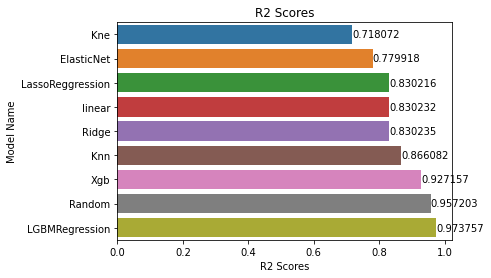

In [ ]:
g = sns.barplot(x = "R2 Score",y =  "Model Name", data = scores)
g.bar_label(g.containers[0])
g.set_xlabel("R2 Scores")
g.set_title("R2 Scores")





Text(0.5, 1.0, 'RMSE Scores')

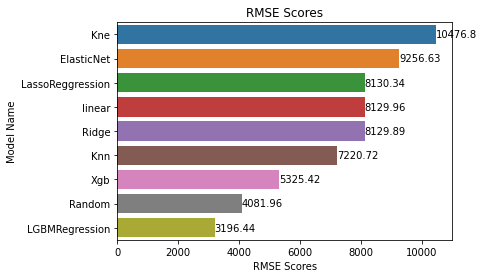

In [ ]:
g = sns.barplot(x = "Sqrt",y =  "Model Name", data = scores)
g.bar_label(g.containers[0])
g.set_xlabel("RMSE Scores")
g.set_title("RMSE Scores")

Text(0.5, 0, 'Değişken Önem Düzeyleri')

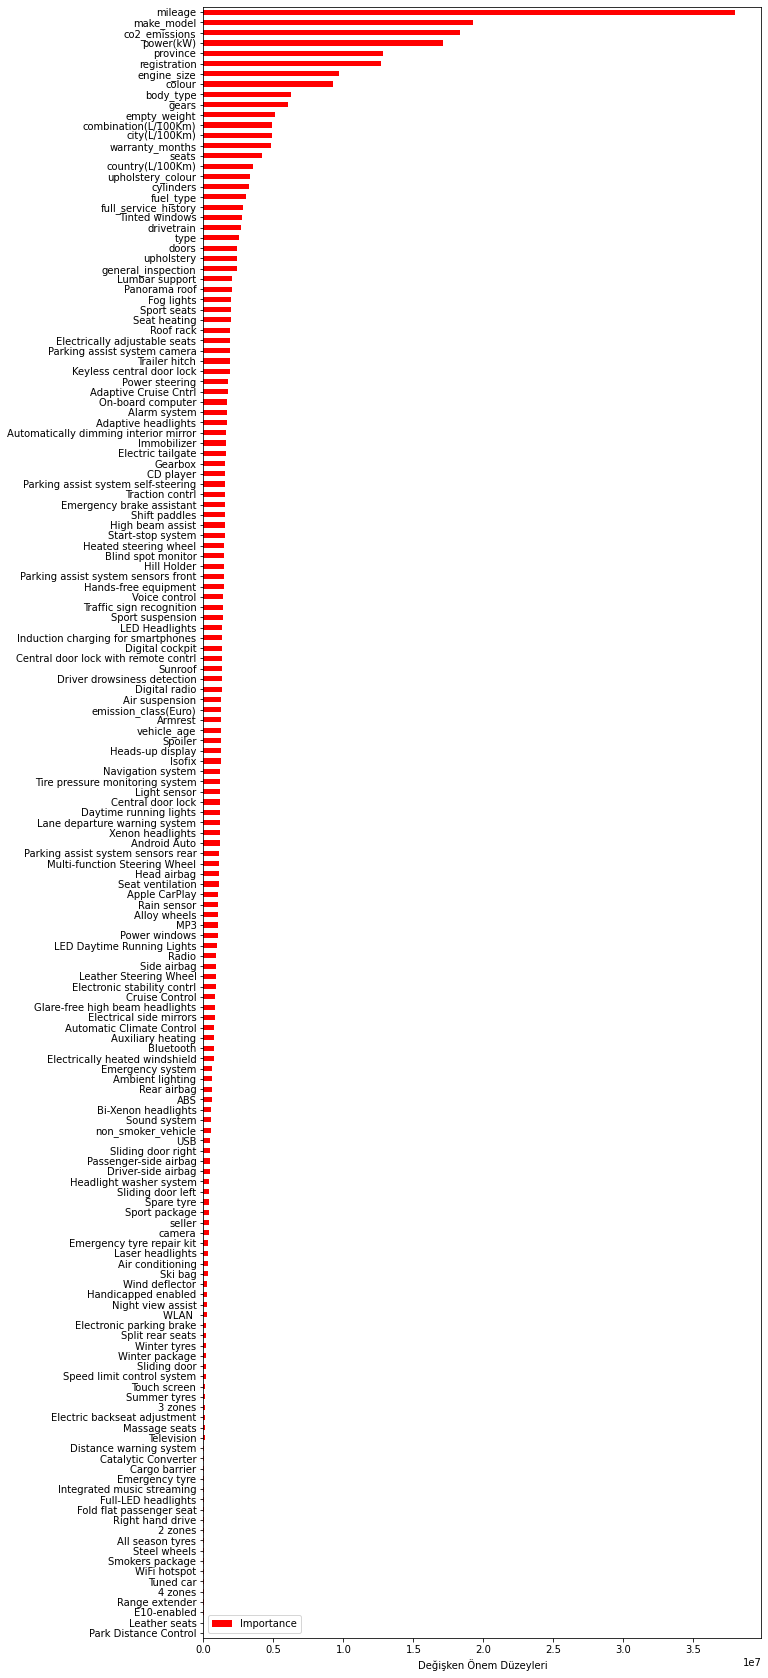

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 30]
Importance = pd.DataFrame({"Importance": gbm.feature_importances_*100},
                         index = X_train.columns)
a=Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
gbm

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

##Variance_Inflation_Factor

In [ ]:
X = df.drop(columns = 'price')
y = df['price']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
VIF=vif_(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vifvalue = pd.DataFrame()
vifvalue["variables"] = X.columns
vifvalue["vifactor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vifvalue

,variables,vifactor
0,province,1.037325
1,make_model,1.472229
2,body_type,1.460692
3,registration,466.706153
4,vehicle_age,31.416820
...,...,...
154,Xenon headlights,2.458754
155,Adaptive Cruise Cntrl,1.795895
156,Central door lock with remote contrl,2.581143
157,Electronic stability contrl,1.801265


In [ ]:
vif_list=(vifvalue.loc[vifvalue['vifactor'] >= 5] )
print (vif_list)

                      variables    vifactor
3                  registration  466.706153
4                   vehicle_age   31.416820
16         combination(L/100Km)   18.052986
17                city(L/100Km)   14.542136
18             country(L/100Km)   15.580078
30                 Android Auto   11.247321
31                Apple CarPlay   11.301568
45                        WLAN          inf
46                 WiFi hotspot         inf
129      Daytime running lights    8.425982
142  LED Daytime Running Lights    8.992239


In [ ]:
#according to high importance and vif we drop some columns with dependent variable
X=df.drop(['registration','city(L/100Km)','country(L/100Km)','price'], axis=1)
y = df['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = (y -y.mean())/y.std()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state =42)

##LGBM last version

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}
gbm = lgb.LGBMRegressor(**hyper_params)


In [ ]:
gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=1000)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[29803]	valid_0's l2: 1.04748e+07	valid_0's l1: 1543.01
[29804]	valid_0's l2: 1.04748e+07	valid_0's l1: 1543.01
[29805]	valid_0's l2: 1.04748e+07	valid_0's l1: 1543.01
[29806]	valid_0's l2: 1.04749e+07	valid_0's l1: 1543.01
[29807]	valid_0's l2: 1.0475e+07	valid_0's l1: 1543.01
[29808]	valid_0's l2: 1.0475e+07	valid_0's l1: 1543.01
[29809]	valid_0's l2: 1.04751e+07	valid_0's l1: 1543.01
[29810]	valid_0's l2: 1.04751e+07	valid_0's l1: 1543.01
[29811]	valid_0's l2: 1.04751e+07	valid_0's l1: 1543.01
[29812]	valid_0's l2: 1.04751e+07	valid_0's l1: 1543.01
[29813]	valid_0's l2: 1.04751e+07	valid_0's l1: 1543.01
[29814]	valid_0's l2: 1.04752e+07	valid_0's l1: 1543.01
[29815]	valid_0's l2: 1.04751e+07	valid_0's l1: 1543
[29816]	valid_0's l2: 1.04751e+07	valid_0's l1: 1543
[29817]	valid_0's l2: 1.04751e+07	valid_0's l1: 1542.99
[29818]	valid_0's l2: 1.04751e+07	valid_0's l1: 1542.99
[29819]	valid_0's l2: 1.04751e+07	valid_0's l1: 1542.99
[2982

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
joblib.dump(gbm,'/content/drive/MyDrive/Colab Notebooks/LGBMregressor.sav') 

['/content/drive/MyDrive/Colab Notebooks/LGBM_last.sav']

In [ ]:
gbm = joblib.load('/content/drive/MyDrive/Colab Notebooks/LGBMregressor.sav')

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:
gbmm = r2_score(y_test, y_pred)
gbm_sqrt = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print('R2 SCORE=' , gbmm)
print('RMSE SCORE=' , gbm_sqrt)

R2 SCORE= 0.9731517820518175
RMSE SCORE= 3233.0922050003805
